<a href="https://colab.research.google.com/github/frank-morales2020/Cloud_curious/blob/master/C2_PAPERBANANA_DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://dwzhu-pku.github.io/PaperBanana/

In [ ]:
!pip install -q google-generativeai
!pip install -U google-genai

## CASE2

🍌 [Planner Agent]: Extracting core logic...
🍌 [Critic Agent]: Reviewing steps for visual clarity...
✅ Finalized by Critic: ['Multi-Scale Feature Extraction', 'Cross-Modal Fusion', 'Banana-Transformer', 'Dense Prediction']


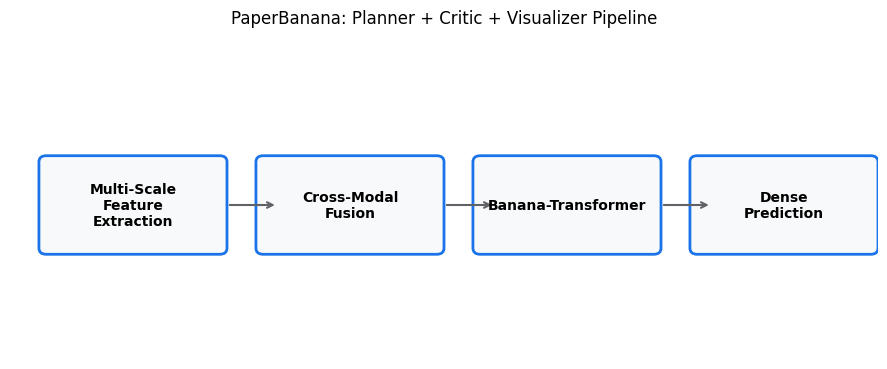

In [ ]:
from google import genai
from google.colab import userdata
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json

# --- SETUP ---
api_key = userdata.get('GEMINI')
client = genai.Client(api_key=api_key)

def run_paper_banana_with_critic(text_input):
    print("🍌 [Planner Agent]: Extracting core logic...")

    # PHASE 1: PLANNING
    plan_prompt = f"Extract 4-6 technical steps from this text as a JSON list of strings: {text_input}"
    plan_response = client.models.generate_content(model='gemini-2.0-flash', contents=plan_prompt)
    raw_steps = json.loads(plan_response.text.strip().replace('```json', '').replace('```', ''))

    # PHASE 2: THE CRITIC (New!)
    print(f"🍌 [Critic Agent]: Reviewing steps for visual clarity...")
    critic_prompt = f"""
    Review these diagram labels: {raw_steps}.
    If a label is longer than 3 words, shorten it to a concise technical term suitable for a small box.
    Return the finalized JSON list of strings only.
    """
    critic_response = client.models.generate_content(model='gemini-2.0-flash', contents=critic_prompt)
    final_steps = json.loads(critic_response.text.strip().replace('```json', '').replace('```', ''))

    print(f"✅ Finalized by Critic: {final_steps}")

    # PHASE 3: VISUALIZER
    fig, ax = plt.subplots(figsize=(len(final_steps) * 2.8, 4))
    ax.set_xlim(0, len(final_steps) * 3)
    ax.set_ylim(0, 5)
    ax.axis('off')

    for i, step in enumerate(final_steps):
        x = 0.5 + (i * 3)
        # Box & Text
        ax.add_patch(patches.FancyBboxPatch((x, 1.8), 2.4, 1.4, boxstyle="round,pad=0.1", ec="#1a73e8", fc="#f8f9fa", lw=2))
        ax.text(x + 1.2, 2.5, step.replace(" ", "\n"), ha='center', va='center', fontweight='bold', fontsize=10)
        # Arrow
        if i < len(final_steps) - 1:
            ax.annotate('', xy=(x + 3.2, 2.5), xytext=(x + 2.5, 2.5), arrowprops=dict(arrowstyle='->', color='#5f6368', lw=1.5))

    plt.title("PaperBanana: Planner + Critic + Visualizer Pipeline", fontsize=12, pad=20)
    plt.show()

# --- RUN ---
research_text = "First we use Multi-Scale Feature Extraction, then Cross-Modal Fusion of Audio and Video, then Banana-Transformer Modeling, and finally Dense Prediction Map Generation."
run_paper_banana_with_critic(research_text)